In [394]:
"""
CREATING MULTIPLEX NETWORKS AND FORMATTING FOR MULTIVERSE

CURRENTLY ONLY FOR SECOND LAYER OF AMINER DATA (899 x 899)
"""

'\nCREATING MULTIPLEX NETWORKS AND FORMATTING FOR MULTIVERSE\n\nCURRENTLY ONLY FOR SECOND LAYER OF AMINER DATA (899 x 899)\n'

In [1]:
import numpy as np

In [379]:
"""
LAYER A2 FORMATTING FOR PROPER MULTIVERSE INPUT
"""

''

In [395]:
A2 = np.genfromtxt('A2.csv', delimiter=',')  # import original AminerData, A2.csv (2nd layer)

In [396]:
A2[0:1,:].shape  # this is a representation of first node

(1, 899)

In [397]:
A2_edges = np.transpose(np.nonzero(A2))  # edgelist format (source node, target node)
A2_edges.shape # these edges are double counted (1,2) != (2,1)

(4814, 2)

In [398]:
type(A2_edges)

numpy.ndarray

In [399]:
"""
edgelist format for MultiVERSE:
(layer, source, target, weight)
"""

iter = 0
A2_new_edges = []
for row in A2_edges:
    row = np.insert(row, 0, 1)        # insert 1 in beginning for layer
    row = list(np.insert(row, 3, 1))  # insert 1 in end for weight
    A2_new_edges.append(row)
    iter += 1

A2_new_edges = np.asarray(A2_new_edges)
A2_new_edges.shape

(4814, 4)

In [400]:
A2_new_edges[65:100]  # sanity check

array([[  1,   1, 728,   1],
       [  1,   1, 733,   1],
       [  1,   1, 742,   1],
       [  1,   3,  39,   1],
       [  1,   3,  93,   1],
       [  1,   3, 176,   1],
       [  1,   3, 316,   1],
       [  1,   3, 317,   1],
       [  1,   3, 407,   1],
       [  1,   3, 456,   1],
       [  1,   3, 467,   1],
       [  1,   3, 471,   1],
       [  1,   3, 472,   1],
       [  1,   3, 477,   1],
       [  1,   3, 552,   1],
       [  1,   3, 576,   1],
       [  1,   3, 682,   1],
       [  1,   4,  23,   1],
       [  1,   4,  28,   1],
       [  1,   4, 263,   1],
       [  1,   4, 292,   1],
       [  1,   4, 341,   1],
       [  1,   4, 382,   1],
       [  1,   4, 407,   1],
       [  1,   4, 408,   1],
       [  1,   4, 409,   1],
       [  1,   4, 477,   1],
       [  1,   4, 552,   1],
       [  1,   4, 681,   1],
       [  1,   4, 728,   1],
       [  1,  10,  10,   1],
       [  1,  10,  15,   1],
       [  1,  10,  17,   1],
       [  1,  10,  94,   1],
       [  1,  

In [401]:
np.savetxt('A2_edges.txt', A2_new_edges, fmt='%d', delimiter=' ')  # save as input .txt file for MultiVERSE

In [ ]:
"""
LAYER B2 FORMATTING FOR PROPER MULTIVERSE INPUT
"""

In [402]:
B2 = np.load('B2.npz')  # loading cosine similarity matrix for 2nd layer of AminerData
B2['F2'].shape

(899, 899)

In [403]:
type(B2['F2'])

numpy.ndarray

In [404]:
B2['F2'][0:1,:].shape  #representation of the first node

(1, 899)

In [405]:
similarity = []
for row in B2['F2']:
    for each in row:
        if 0 < np.round(each, decimals=2) < 1:
            similarity.append(each)

In [406]:
similarity = np.asarray(similarity)
len(similarity)

315362

Cosine Similarities between 0.05 < sim < .995

min: 0.005000523332264318
max: 0.9949795704456791
mean: 0.07534895776762207
median: 0.02753670312528149
STD: 0.13684700254448334
97.5th %ile: 0.34904296285658876
Num. edges: 13528


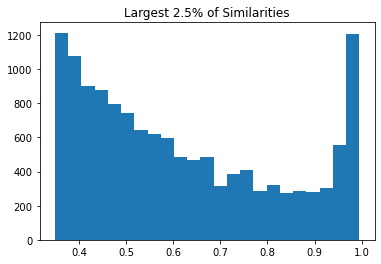

In [426]:
print("Cosine Similarities between 0.05 < sim < .995")
print("")
print("min:",np.min(similarity))
print("max:",np.max(similarity))
print("mean:",np.mean(similarity))
print("median:", np.median(similarity))
print("STD:", np.std(similarity))
print("97.5th %ile:", np.mean(similarity) + 2*np.std(similarity))

threshold = np.mean(similarity) + np.std(similarity)
print("Num. edges:", len(similarity[similarity > np.mean(similarity) + 2*np.std(similarity)]))

plt.hist(similarity[similarity > np.mean(similarity) + 2*np.std(similarity)], bins='auto')
plt.title("Largest 2.5% of Similarities")
plt.plot()
plt.show()

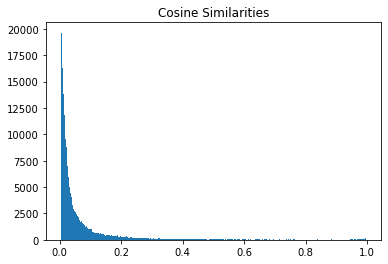

In [423]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(similarity, bins='auto')
plt.title("Cosine Similarities")
plt.plot()
plt.show()

Cosine Similarities between 0 < sim < 1

mean: 0.03261213018387313
median: 0.00046364493995302257
STD: 0.10680705165581651
97.5th %ile: 0.13941918183968965
Number of edges: 23532


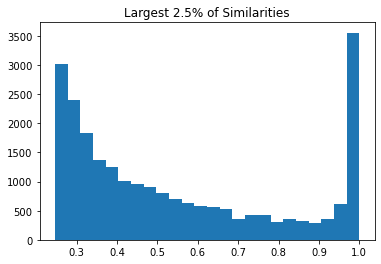

In [409]:
print("Cosine Similarities between 0 < sim < 1")
print("")
print("mean:", np.mean(B2['F2']))
print("median:", np.median(B2['F2']))
print("STD:", np.std(B2['F2']))
print("97.5th %ile:", np.mean(B2['F2']) + np.std(B2['F2']))
print("Number of edges:", len(B2['F2'][B2['F2'] > np.mean(B2['F2']) + 2*np.std(B2['F2'])]))

plt.hist(B2['F2'][B2['F2'] > np.mean(B2['F2']) + 2*np.std(B2['F2'])], bins='auto')
plt.title('Largest 2.5% of Similarities')
plt.plot()
plt.show()

In [410]:
threshold  # cosine similarities above this value will be an edge between the nodes

0.2121959603121054

In [411]:
# edges (matrix indices) for node similarity above threshold value
B2_edges = np.transpose(np.where(B2['F2'] > threshold)) 
type(B2_edges)

numpy.ndarray

In [412]:
"""
edgelist format for MultiVERSE:
(layer, source, target, weight)
"""

iter = 0
B2_new_edges = []
for row in B2_edges:
    row = np.insert(row, 0, 2)
    row = list(np.insert(row, 3, 1))
    B2_new_edges.append(row)
    iter += 1

B2_new_edges = np.asarray(B2_new_edges)
B2_new_edges.shape

(27928, 4)

In [414]:
B2_new_edges[:20]  # sanity check

array([[  2,   1,   1,   1],
       [  2,   1, 249,   1],
       [  2,   1, 298,   1],
       [  2,   1, 450,   1],
       [  2,   1, 543,   1],
       [  2,   1, 552,   1],
       [  2,   1, 553,   1],
       [  2,   1, 656,   1],
       [  2,   1, 712,   1],
       [  2,   1, 728,   1],
       [  2,   2,   2,   1],
       [  2,   2,   8,   1],
       [  2,   2,  39,   1],
       [  2,   2,  43,   1],
       [  2,   2,  72,   1],
       [  2,   2,  84,   1],
       [  2,   2,  89,   1],
       [  2,   2,  95,   1],
       [  2,   2,  97,   1],
       [  2,   2, 150,   1]])

In [415]:
np.savetxt('B2_edges.txt', B2_new_edges, fmt='%d', delimiter=' ')  # save as input .txt file for MultiVERSE

In [417]:
layer2_multiplex_edges = np.vstack((A2_new_edges, B2_new_edges))
layer2_multiplex_edges.shape

(32742, 4)

In [418]:
layer2_multiplex_edges

array([[  1,   1,  22,   1],
       [  1,   1,  29,   1],
       [  1,   1,  48,   1],
       ...,
       [  2, 898, 445,   1],
       [  2, 898, 889,   1],
       [  2, 898, 898,   1]])

In [419]:
np.savetxt('Aminer_layer2_multiplex_edges.txt', layer2_multiplex_edges, fmt='%d', delimiter=' ')  # save as input .txt file for MultiVERSE